In [19]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

NameError: name 'reload' is not defined

In [20]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import pandas as pd 
frame0=pd.read_csv('D:\Git\Python\Oligos\514.csv',skiprows=[0])
                 
frame0
'''
frame=pd.read_csv('520.csv',skiprows=[0],
                index_col=['日期']).loc['2018/5/21':'2018/5/26']
frame=pd.concat([frame0,frame])
frame=frame.reset_index()
'''

UnicodeEncodeError: 'mbcs' codec can't encode characters in position 0--1: invalid character

In [ ]:
ts= pd.crosstab(frame['日期'], frame['订单来源'])
states=['外部','基因部','测序部','蛋白组']
ts=ts.reindex(columns=states)
ts.to_csv('D:\Jupyter\oligo\May-20\out.csv')
fig, ax = plt.subplots()
fig=ts.plot.bar(ax=ax,stacked=True, alpha=0.5)
ax.set_title('5月20日至26日引物条数统计',fontsize=16)
ax.set_xlabel('日期',fontsize=14)
ax.set_ylabel('条数',fontsize=14)
fig
plt.savefig('ts520',dpi=400,bbox_inches='tight')

[Text(0.5,1,'一周引物条数统计'), None]

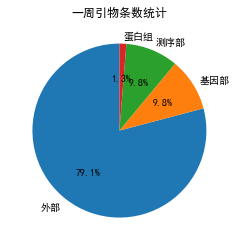

In [12]:
pivot1=frame.pivot_table(['序号'], index=['订单来源'],
                aggfunc='count', fill_value=0).sort_values(by=['序号'],ascending=False)
labels =pivot1.index
sizes = pivot1.values
fig, ax = plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.set(aspect='equal',title='一周引物条数统计')

In [17]:
%matplotlib
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["外部:2724条(79.1%)",
          "基因部:339条(9.8%)",
          "测序部:336条(9.8%)",
          "蛋白组:44条(1.3%)"]
data = [2724, 339, 336, 44]

wedges, texts = ax.pie(data, wedgeprops=dict(width=1), startangle=-320)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("各部门一周引物条数比例")

plt.show()
plt.savefig('tsbl520',dpi=200)

Using matplotlib backend: Qt5Agg


In [18]:
jjs=frame.groupby(['日期','订单来源'])['碱基'].sum().unstack('订单来源').fillna(0)
states=['外部','基因部','测序部','蛋白组']
jjs=jjs.reindex(columns=states)
jjs

订单来源,外部,基因部,测序部,蛋白组
日期,,,,
2018/5/20,5640.0,1391.0,260.0,0.0
2018/5/21,13601.0,2387.0,382.0,0.0
2018/5/22,17844.0,3139.0,1040.0,915.0
2018/5/23,14362.0,2320.0,1629.0,283.0
2018/5/24,9052.0,506.0,1377.0,0.0
2018/5/25,8910.0,6200.0,1266.0,47.0
2018/5/26,547.0,355.0,946.0,0.0


In [12]:
pivot2=frame.pivot_table(['碱基'], index=['订单来源','序号'])
pivot2           
fig, ax = plt.subplots()
pivot2['碱基'].hist(bins=80)
ax.set_title('引物碱基数分布情况',fontsize=16)
ax.set_xlabel('碱基数',fontsize=14)
ax.set_ylabel('条数',fontsize=14)


Text(0,0.5,'条数')

In [13]:
groupywy=frame.groupby(['业务员'])
ywy=groupywy['碱基','金额'].sum().sort_values(by=['碱基'],ascending=False)
#pd.DataFrame(groupywy.size()).rename(columns={0: '条数'}).join(ywy)
plt.rc('figure', figsize=(10, 6))
fig, ax = plt.subplots()
fig=ywy.plot.bar(ax=ax,alpha=0.5)
ax.set_title('各业务员一周引物订单统计(数据来自系统)',fontsize=16)
ax.set_xlabel('业务员',fontsize=14)
ax.set_ylabel('',fontsize=14)
fig
#plt.savefig('je1',dpi=400,bbox_inches='tight')


In [ ]:
jjs=frame.groupby(['日期','订单来源'])['碱基'].sum().unstack('订单来源').fillna(0)
states=['外部','基因部','测序部','蛋白组']
jjs=jjs.reindex(columns=states)
jjs